# Algoritmo de Dijkstra padrão

In [ ]:
# O(V^2 + E) time | O(V) space - where V is the number of vertices and E is the number of edges in the input graph
def dijkstrasAlgorithm(start: int, edges: list):
    """
    Implements Dijkstra's algorithm to find the shortest path from a starting node to all other nodes in a graph.

    Args:
        start (int): The starting node index.
        edges (list of list): Adjacency list representing the graph. Each index corresponds to a vertex,
                            and each entry is a list of pairs [destination, weight].

    Returns:
        list: A list of the shortest distances from the starting node to each node. If a node is not reachable,
            the distance is -1.
    """
    numberOfVertices = len(edges)

    # Initialize the minimum distances for all vertices as infinity
    # except the starting vertex which is set to 0.
    minDistances = [float("inf") for _ in range(numberOfVertices)]
    minDistances[start] = 0

    # Keep track of visited nodes to avoid reprocessing them.
    visited = set()

    # Continue processing nodes until all have been visited.
    while len(visited) != numberOfVertices:
        # Find the vertex with the smallest known distance that has not been visited.
        vertex, currentMinDistance = getVertexWithMinDistance(minDistances, visited)

        # If the smallest distance is infinity, all remaining vertices are unreachable.
        if currentMinDistance == float("inf"):
            break

        # Mark the current vertex as visited.
        visited.add(vertex)

        # Iterate through all the neighbors of the current vertex.
        for edge in edges[vertex]:
            destination, distanceToDestination = edge

            # Skip the neighbor if it has already been visited.
            if destination in visited:
                continue

            # Calculate the new potential path distance to the neighbor.
            newPathDistance = currentMinDistance + distanceToDestination
            currentDestinationDistance = minDistances[destination]

            # Update the shortest distance to the neighbor if the new path is shorter.
            if newPathDistance < currentDestinationDistance:
                minDistances[destination] = newPathDistance

    # Replace any remaining infinity distances with -1 to indicate unreachable nodes.
    return list(map(lambda x: -1 if x == float("inf") else x, minDistances))


def getVertexWithMinDistance(distances, visited):
    """
    Helper function to find the vertex with the smallest known distance that has not been visited.

    Args:
        distances (list): A list of the shortest known distances to each vertex.
        visited (set): A set of vertices that have already been visited.

    Returns:
        tuple: The index of the vertex with the smallest distance and its distance value.
    """
    currentMinDistance = float("inf")
    vertex = -1

    # Iterate over all vertices to find the one with the smallest distance.
    for vertexIdx, distance in enumerate(distances):
        # Skip the vertex if it has already been visited.
        if vertexIdx in visited:
            continue

        # Update the current minimum distance and vertex if a smaller distance is found.
        if distance <= currentMinDistance:
            vertex = vertexIdx
            currentMinDistance = distance

    return vertex, currentMinDistance

# Classe MinHeap

In [ ]:
class MinHeap:
    """
    MinHeap class: Implements a MinHeap data structure to efficiently manage vertices and their distances
    for algorithms like Dijkstra. This implementation keeps track of the position of each vertex using
    a vertex map for constant-time lookups and updates.
    """
    def __init__(self, array):
        """
        Initializes the MinHeap with an input array of (vertex, distance) pairs.

        Args:
            array (list): List of tuples where each tuple is (vertex, distance).
                          The distance is typically initialized to infinity except for the starting vertex.

        Attributes:
            vertexMap (dict): Maps each vertex to its position in the heap for quick access.
            heap (list): List representing the binary heap as an array.
        """
        # Create a vertex map: Maps vertices to their indices in the heap.
        self.vertexMap = {idx: idx for idx in range(len(array))}

        # Build the heap from the input array to satisfy the heap property.
        self.heap = self.buildHeap(array)

    def isEmpty(self):
        """
        Checks if the heap is empty.

        Returns:
            bool: True if the heap is empty, False otherwise.
        """
        return len(self.heap) == 0

    def buildHeap(self, array):
        """
        Builds the heap from an input array in O(n) time.

        Args:
            array (list): List of (vertex, distance) pairs.

        Returns:
            list: The input array transformed into a valid MinHeap.
        """
        # Start from the first parent node and sift down each node.
        firstParentIdx = (len(array) - 2) // 2
        for currentIdx in reversed(range(firstParentIdx + 1)):
            self.siftDown(currentIdx, len(array) - 1, array)
        return array

    def siftDown(self, currentIdx, endIdx, heap):
        """
        Restores the heap property by "sifting down" a node into its correct position.

        Args:
            currentIdx (int): Index of the node to sift down.
            endIdx (int): Last index in the heap.
            heap (list): The heap array.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        childOneIdx = currentIdx * 2 + 1  # Index of the first child
        while childOneIdx <= endIdx:
            # Determine the index of the second child
            childTwoIdx = currentIdx * 2 + 2 if currentIdx * 2 + 2 <= endIdx else -1

            # Choose the smaller child to maintain the min-heap property
            if childTwoIdx != -1 and heap[childTwoIdx][1] < heap[childOneIdx][1]:
                idxToSwap = childTwoIdx
            else:
                idxToSwap = childOneIdx

            # Swap if the child is smaller than the current node
            if heap[idxToSwap][1] < heap[currentIdx][1]:
                self.swap(currentIdx, idxToSwap, heap)
                currentIdx = idxToSwap  # Move to the swapped position
                childOneIdx = currentIdx * 2 + 1  # Update the first child index
            else:
                return

    def siftUp(self, currentIdx, heap):
        """
        Restores the heap property by "sifting up" a node into its correct position.

        Args:
            currentIdx (int): Index of the node to sift up.
            heap (list): The heap array.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        parentIdx = (currentIdx - 1) // 2  # Calculate parent index
        while currentIdx > 0 and heap[currentIdx][1] < heap[parentIdx][1]:
            self.swap(currentIdx, parentIdx, heap)  # Swap with parent
            currentIdx = parentIdx  # Move to the parent's position
            parentIdx = (currentIdx - 1) // 2

    def remove(self):
        """
        Removes and returns the smallest element (root) in the heap.

        Returns:
            tuple: The (vertex, distance) pair with the smallest distance.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        if self.isEmpty():
            return None

        # Swap the root with the last element and remove it
        self.swap(0, len(self.heap) - 1, self.heap)
        vertex, distance = self.heap.pop()
        self.vertexMap.pop(vertex)  # Remove the vertex from the map

        # Restore the heap property
        self.siftDown(0, len(self.heap) - 1, self.heap)
        return vertex, distance

    def swap(self, i, j, heap):
        """
        Swaps two nodes in the heap and updates their positions in the vertexMap.

        Args:
            i (int): Index of the first node.
            j (int): Index of the second node.
            heap (list): The heap array.
        """
        self.vertexMap[heap[i][0]] = j  # Update vertexMap for heap[i]
        self.vertexMap[heap[j][0]] = i  # Update vertexMap for heap[j]
        heap[i], heap[j] = heap[j], heap[i]  # Swap the nodes in the heap

    def update(self, vertex, value):
        """
        Updates the distance of a given vertex and restores the heap property.

        Args:
            vertex (int): The vertex whose distance is to be updated.
            value (int): The new distance value.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        # Update the heap with the new (vertex, value) pair
        self.heap[self.vertexMap[vertex]] = (vertex, value)
        # Restore the heap property by sifting up the updated node
        self.siftUp(self.vertexMap[vertex], self.heap)

# Algoritmo de Dijkstra com Min-Heap

In [ ]:
# O((v + e) * log(v)) time | O(v) space — where v is the number
# of vertices and e is the number of edges in the input graph
def minHeapDijkstrasAlgorithm(start, edges):
    """
    Implements Dijkstra's algorithm to find the shortest paths from a starting vertex to all other vertices
    in a weighted graph. The graph is represented using an adjacency list.

    Args:
        start (int): The starting vertex index.
        edges (list of list): An adjacency list where each index represents a vertex, and each entry
                              is a list of [destination, weight] pairs.

    Returns:
        list: A list of minimum distances from the starting vertex to each vertex in the graph.
              If a vertex is unreachable, its distance is represented as -1.
    """
    # Step 1: Initialize the number of vertices in the graph
    numberOfVertices = len(edges)

    # Step 2: Initialize the minimum distances with infinity
    # Set the starting vertex's distance to 0
    minDistances = [float("inf") for _ in range(numberOfVertices)]
    minDistances[start] = 0

    # Step 3: Initialize the MinHeap to track the vertices and their current shortest distances
    minDistancesHeap = MinHeap([(idx, float("inf")) for idx in range(numberOfVertices)])
    minDistancesHeap.update(start, 0)  # Update the starting vertex's distance to 0

    # Step 4: Process vertices until the heap is empty
    while not minDistancesHeap.isEmpty():
        # Extract the vertex with the smallest known distance
        vertex, currentMinDistance = minDistancesHeap.remove()

        # If the current distance is infinity, no further reachable vertices exist
        if currentMinDistance == float("inf"):
            break

        # Step 5: Relaxation - Update distances for all neighboring vertices
        for edge in edges[vertex]:
            destination, distanceToDestination = edge  # Extract neighbor and weight

            # Calculate the new potential path distance
            newPathDistance = currentMinDistance + distanceToDestination
            currentDestinationDistance = minDistances[destination]

            # If the new path is shorter, update the distance and the heap
            if newPathDistance < currentDestinationDistance:
                minDistances[destination] = newPathDistance
                minDistancesHeap.update(destination, newPathDistance)

    # Step 6: Convert unreachable vertices' distances from infinity to -1
    return list(map(lambda x: -1 if x == float("inf") else x, minDistances))

start = 0
edges = [
    [[1, 7]],
    [[2, 6], [3, 20], [4, 3]],
    [[3, 14]],
    [[4, 2]],
    [],
    [],
]

# Execução dos experimentos

Iniciando o experimento...

Processando grafos com 100 nós...
  Repetição 1/20...
  Repetição 2/20...
  Repetição 3/20...
  Repetição 4/20...
  Repetição 5/20...
  Repetição 6/20...
  Repetição 7/20...
  Repetição 8/20...
  Repetição 9/20...
  Repetição 10/20...
  Repetição 11/20...
  Repetição 12/20...
  Repetição 13/20...
  Repetição 14/20...
  Repetição 15/20...
  Repetição 16/20...
  Repetição 17/20...
  Repetição 18/20...
  Repetição 19/20...
  Repetição 20/20...

Processando grafos com 500 nós...
  Repetição 1/20...
  Repetição 2/20...
  Repetição 3/20...
  Repetição 4/20...
  Repetição 5/20...
  Repetição 6/20...
  Repetição 7/20...
  Repetição 8/20...
  Repetição 9/20...
  Repetição 10/20...
  Repetição 11/20...
  Repetição 12/20...
  Repetição 13/20...
  Repetição 14/20...
  Repetição 15/20...
  Repetição 16/20...
  Repetição 17/20...
  Repetição 18/20...
  Repetição 19/20...
  Repetição 20/20...

Processando grafos com 1000 nós...
  Repetição 1/20...
  Repetição 2/20...
  Rep

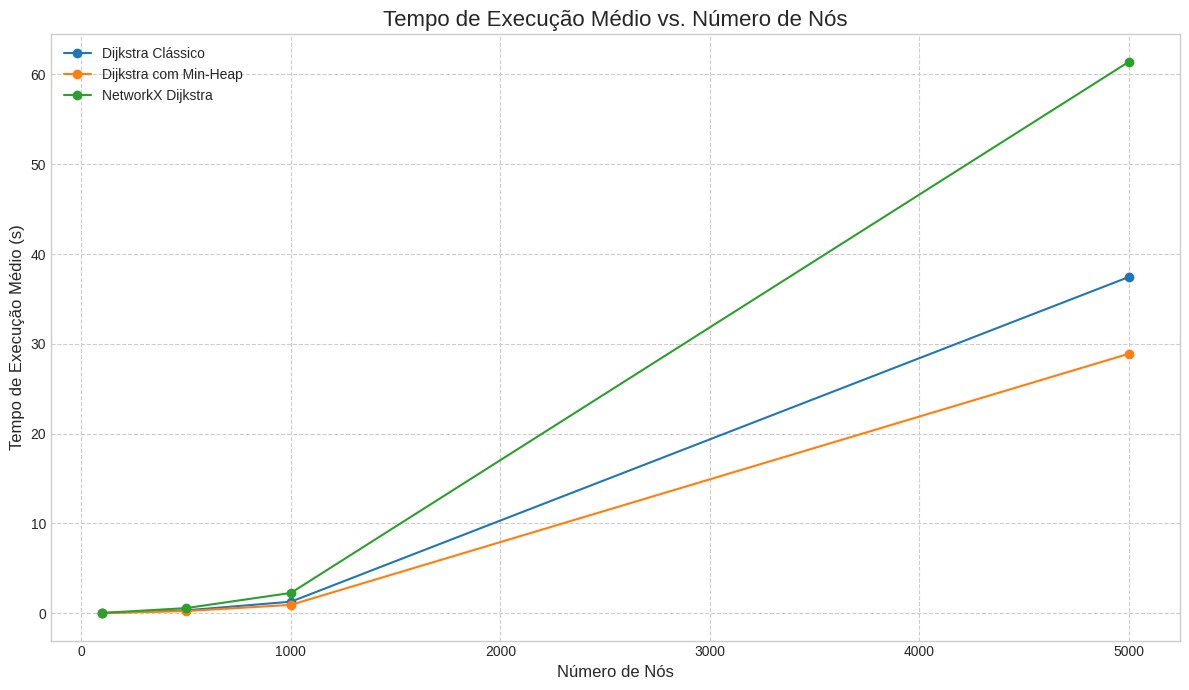

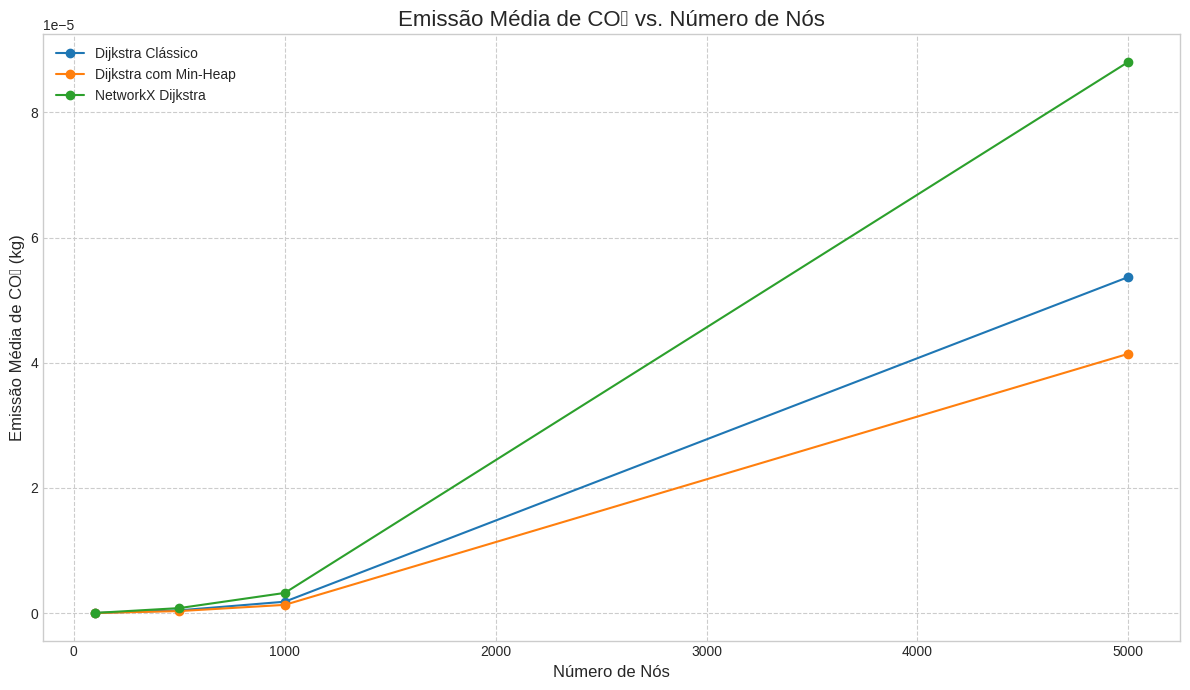

In [ ]:
import time
import random
import warnings
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from codecarbon import OfflineEmissionsTracker

# Ignorar warnings para manter a saída limpa
warnings.filterwarnings('ignore', category=UserWarning)

def convert_nx_to_adj_list(G: nx.Graph):
    """
    Converte um grafo networkx para o formato de lista de adjacências
    exigido pela sua função: list[list[list[int]]].
    """
    nodes_count = G.number_of_nodes()
    adj_list = [[] for _ in range(nodes_count)]
    for u, v, data in G.edges(data=True):
        weight = data['weight']
        # Adiciona a aresta nos dois sentidos se o grafo for não direcionado
        adj_list[u].append([v, weight])
        adj_list[v].append([u, weight])
    return adj_list

def generate_connected_weighted_graph(nodes_number: int):
    """Gera um grafo ponderado e conectado de forma eficiente."""
    #G = nx.barabasi_albert_graph(nodes_number, 2, seed=42)
    G = nx.gnp_random_graph(nodes_number, 2, 42)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.randint(1, 20)
    return G

def run_dijkstra_versions(graph, adj_list, source_nodes):
    """
    Executa as três versões de Dijkstra para um conjunto de nós de origem.
    Agora aceita o grafo em dois formatos diferentes.
    """
    results = []
    algorithms = {
        "Dijkstra Clássico": dijkstrasAlgorithm,
        "Dijkstra com Min-Heap": minHeapDijkstrasAlgorithm,
        "NetworkX Dijkstra": nx.single_source_dijkstra,
    }

    for name, func in algorithms.items():
        tracker = OfflineEmissionsTracker(country_iso_code="BRA", log_level='error')
        tracker.start()

        start_time = time.time()
        for node in source_nodes:
            # Condicional para chamar cada função com os argumentos e formato corretos
            if "NetworkX" in name:
                func(graph, node)
            else:
                # Chama sua função com (start, edges) na ordem correta
                func(node, adj_list)
        end_time = time.time()

        emissions_data = tracker.stop()

        results.append({
            "Algorithm": name,
            "Time (s)": end_time - start_time,
            "CO2 Emission (kg)": emissions_data if emissions_data else 0
        })
    return results

def run_experiment(
    times: int = 20,
    node_sizes: list = [100, 500, 1000, 2500, 5000, 10000]
) -> None:
    """
    Executa o experimento comparativo com diferentes versões do algoritmo de Dijkstra.
    """
    all_results = []

    print("Iniciando o experimento...")

    for nodes_number in node_sizes:
        print(f"\nProcessando grafos com {nodes_number} nós...")
        graph = generate_connected_weighted_graph(nodes_number)
        # Converte o grafo para o formato de lista de adjacências uma vez por tamanho
        adj_list_for_custom_func = convert_nx_to_adj_list(graph)

        for i in range(times):
            print(f"  Repetição {i + 1}/{times}...")
            source_nodes = random.sample(list(graph.nodes), 5)
            # Passa ambos os formatos de grafo para a função de teste
            run_results = run_dijkstra_versions(graph, adj_list_for_custom_func, source_nodes)

            for result in run_results:
                result['Nodes'] = nodes_number
                result['Repetition'] = i + 1
                all_results.append(result)

    df_results = pd.DataFrame(all_results)
    df_results.to_csv("dijkstra_experiment_raw_results.csv", index=False)

    summary = df_results.groupby(['Nodes', 'Algorithm']).agg(
        Mean_Time=('Time (s)', 'mean'),
        Std_Time=('Time (s)', 'std'),
        Mean_CO2=('CO2 Emission (kg)', 'mean'),
        Std_CO2=('CO2 Emission (kg)', 'std')
    ).reset_index()

    def calculate_ci(mean, std, n, confidence=0.95):
        if std == 0 or pd.isna(std): return (mean, mean)
        se = std / np.sqrt(n)
        ci = st.t.interval(confidence, df=n-1, loc=mean, scale=se)
        return ci

    summary['Time CI 95%'] = summary.apply(
        lambda row: calculate_ci(row['Mean_Time'], row['Std_Time'], times), axis=1)
    summary['CO2 Emission CI 95%'] = summary.apply(
        lambda row: calculate_ci(row['Mean_CO2'], row['Std_CO2'], times), axis=1)

    summary.to_csv("dijkstra_experiment_summary.csv", index=False)
    print("\nTabela de resumo salva em 'dijkstra_experiment_summary.csv'")

    generate_plots(summary)
    print("Gráficos comparativos salvos em 'execution_time_comparison.png' e 'co2_emission_comparison.png'")

def generate_plots(summary_df: pd.DataFrame):
    """Gera e salva gráficos comparativos a partir do DataFrame de resumo."""
    plt.style.use('seaborn-v0_8-whitegrid')

    fig_time, ax_time = plt.subplots(figsize=(12, 7))
    for name, group in summary_df.groupby('Algorithm'):
        ax_time.plot(group['Nodes'], group['Mean_Time'], marker='o', linestyle='-', label=name)

    ax_time.set_title('Tempo de Execução Médio vs. Número de Nós', fontsize=16)
    ax_time.set_xlabel('Número de Nós', fontsize=12)
    ax_time.set_ylabel('Tempo de Execução Médio (s)', fontsize=12)
    ax_time.legend()
    ax_time.grid(True, which='both', linestyle='--')
    fig_time.tight_layout()
    fig_time.savefig("execution_time_comparison.png")

    fig_co2, ax_co2 = plt.subplots(figsize=(12, 7))
    for name, group in summary_df.groupby('Algorithm'):
        ax_co2.plot(group['Nodes'], group['Mean_CO2'], marker='o', linestyle='-', label=name)

    ax_co2.set_title('Emissão Média de CO₂ vs. Número de Nós', fontsize=16)
    ax_co2.set_xlabel('Número de Nós', fontsize=12)
    ax_co2.set_ylabel('Emissão Média de CO₂ (kg)', fontsize=12)
    ax_co2.legend()
    ax_co2.grid(True, which='both', linestyle='--')
    fig_co2.tight_layout()
    fig_co2.savefig("co2_emission_comparison.png")

if __name__ == '__main__':
    node_sizes_to_test = [100,500,1000,5000]
    #node_sizes_to_test = [10,100]
    run_experiment(times=20, node_sizes=node_sizes_to_test)